# import all the necessary library

In [58]:
import numpy as np
import math
import matplotlib.pyplot as plt


In [3]:
x_train=np.array([1.0,2.0])
y_train=np.array([300.0,500.0])

# Compute the cost for linear regression

In [42]:
def compute_cost(x,y,w,b) :
    m = x.shape[0]
    cost=0;
    
    for i in range(m) :
        cost=cost+(w*x[i]+b-y[i])**2
        
    total_cost=cost*1/(2*m)
 
    return total_cost

In [24]:
compute_cost(x_train,y_train,10,20)

71125.0


71125.0

# Compute w and b with gradient descent

In [39]:
def compute_gradient(x,y,w,b) :
    m=x.shape[0]
    dw =0;
    db=0;
    
    for i in range(m) :
        dw = dw+(w*x[i]+b-y[i])*x[i]
        db = db+(w*x[i]+b-y[i])
        
    
        
    return dw/m,db/m
        
    
    

In [26]:
compute_gradient(x_train,y_train,10,10)

value of dw  -610.0
value of db  -375.0


(-610.0, -375.0)

 # Calculate gradient function with updated w and b

In [43]:
def gradient_descent(x,y,w_in,b_in,alpha,cost_function,gradient_function,iteration) :
    w=w_in
    b=b_in
    history=[]
    cost = []
    
    for i in range(iteration) :
        dw,db =gradient_function(x,y,w,b)
        w = w - alpha * dw
        b = b - alpha * db
        cost.append(cost_function(x,y,w,b))
        history.append([w,b])
        if i% math.ceil(iteration/10) == 0:
            print(f"Iteration {i:4}: Cost {cost[-1]:0.2e} ",
                  f"dj_dw: {dw: 0.3e}, dj_db: {db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
        
    
    return w,b,history,cost
        
        

In [46]:
w,b,history,cost=gradient_descent(x_train,y_train,0,0,1.0e-2,compute_cost,compute_gradient,10000)
print(f"final value of w and b is ({w:8.4f},{b:8.4f})")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


In [49]:
def compute_linear_regression(x,w,b) :
    m = x.shape[0]
    
    for i in range(m) :
        predict = w*x[i]+b
        print(f"predicted value for {x[i]} is ", predict)
    

In [51]:
compute_linear_regression(np.array([1.2,2.0]),w,b)

predicted value for 1.2 is  340.00298862894317
predicted value for 2.0 is  499.9972692299973


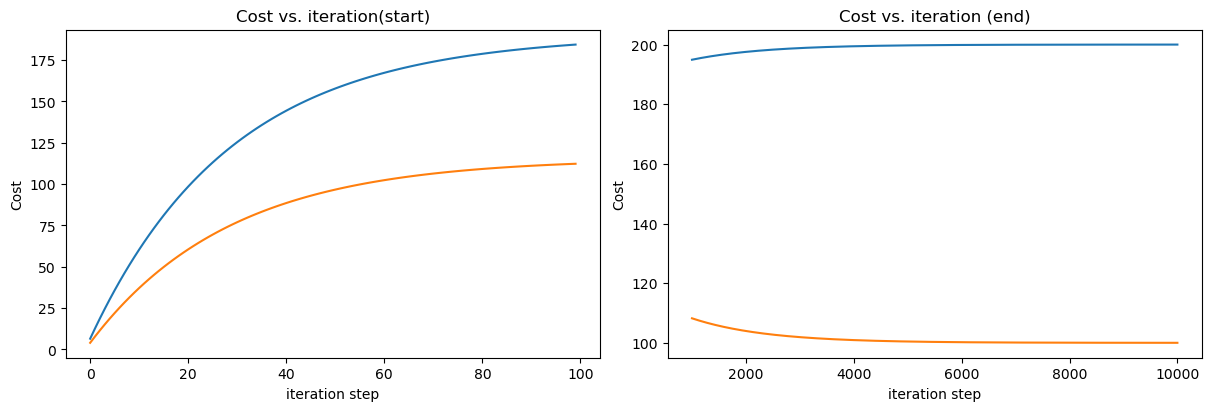

In [56]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(history[:100])
ax2.plot(1000 + np.arange(len(history[1000:])),history[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()